Just testing this out

-10.650319260075621
10.65031926007562


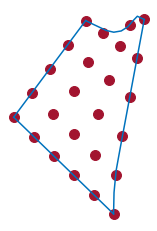

In [22]:
%run 'baker_cs34_functions_sandbox.py'

fn = "iea37-boundary-cs3.yaml"
bndryPts = getTurbAtrbtCs3YAML(fn)
clsdBP = closeBndryList(bndryPts)
coordList = closeBndryList(bndryPts)    # Duplicate the 1st coord for a closed boundary

fname_turb = "iea37-10mw.yaml"
fname_wr = "iea37-windrose-cs3.yaml"
wind_dir, wind_dir_freq, wind_speeds, wind_speed_probs, num_speed_bins, min_speed, max_speed = iea37aepC.getWindRoseYAML(fname_wr)
turb_ci, turb_co, rated_ws, rated_pwr, turb_diam = iea37aepC.getTurbAtrbtYAML(fname_turb)

displaySize = np.recarray(1, coordinate)
displaySize.x = 10
displaySize.y = 10
numLinspace = 10
numGridLines = 10                   # How many gridlines we'll use for the visualization
printOffset = (5, 5)
vertexList = [0, 6, 8, 9, 18]       # Hard code the vertices (though this could be done algorithmically)

scaledAEP = 1e5
scaledTC = 1e3

# Spline up the boundary
[splineList, segCoordList] = makeCs3BndrySplines(vertexList, clsdBP, numGridLines)

#-- Testing --#
numTurbs = 25
#turbRandoList = iea37cs3randomstarts(numTurbs, splineList, vertexList, bndryPts, turb_diam)

#-- Plot the boundary --#
for i in range(numSides):
    plt.hold = True
    printBoundaryArray(segCoordList[i].x, splineList[i](segCoordList[i].x), 5)

#-- Plot the turbine locations --#
#- Plot the example layout -#
fn = "iea37-ex-opt3.yaml"
ex_turb_coords, fname_turb, fname_wr = iea37aepC.getTurbLocYAML(fn)
x0sEx = makeFirstCoordStruct(ex_turb_coords)
x0aEx = makeCoordArray(x0sEx)
printTurbines(x0sEx, getPltClrs().getColor(1), turb_diam/2)
#printTurbines(turbRandoList, getPltClrs().getColor(1), turb_diam/2)
#x0 = makeCoordArray(turbRandoList)
#Args = optimoMakeArgTuples(wind_dir_freq, wind_speeds, wind_speed_probs, wind_dir, turb_diam, turb_ci, turb_co, rated_ws, rated_pwr, scaledAEP, scaledTC)
#startAEPex = optimoFun(x0aEx, Args)
exCoords = makeCoordMatrix(x0aEx)
startAEPex = iea37aepC.calcAEPcs3((exCoords * scaledTC), wind_dir_freq, wind_speeds, wind_speed_probs, wind_dir, turb_diam, turb_ci, turb_co, rated_ws, rated_pwr)
scaledAEPex = sum(startAEPex / scaledAEP)
print(scaledAEPex)


10.65041365706673


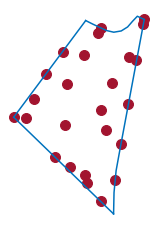

In [29]:
# Optimized from ex. layout

turbListOpt = [ 10363.7999999999,
            10339.0002099738, \
            8856.4337381459, \
            8952.4100142127, \
            9874.9796355798, \
            10090.9955577907, \
            7717.8568892167, \
            8395.7432375154, \
            9321.8549180849, \
            9848.2019219908, \
            7138.7610093461, \
            7850.3243626916, \
            8934.0412583744, \
            9603.5324500883, \
            6515.4321372410, \
            6754.4094362848, \
            7788.7713824879, \
            9129.9180657667, \
            9416.0143016015, \
            6098.3000000000, \
            7930.1465702169, \
            7442.7900797922, \
            8443.4906033379, \
            8499.0021259221, \
            8937.6914260313, \
            6490.3000000000, \
            6357.6844725682, \
            6046.8105760982, \
            6212.2565755481, \
            5271.8185128605, \
            5179.7469631547, \
            5439.6379345956, \
            5344.2140571785, \
            4417.7025104588, \
            3733.1673393326, \
            4694.4250745417, \
            4388.6886557197, \
            3522.1807646441, \
            2425.1645313492, \
            3263.5444796080, \
            3905.5949920958, \
            3029.3106050708, \
            2867.3813710461, \
            1258.7253125071, \
            3297.5000000000, \
            1667.4978213738, \
            1995.2707835567, \
            1411.6059513438, \
            1152.7085989009, \
            547.3824701170]

x0sOpt = makeCoordStruct(turbListOpt)
x0aOpt = makeCoordArray(x0sOpt)
exCoordsOpt = makeCoordMatrix(x0aOpt)
startAEPexOpt = iea37aepC.calcAEPcs3((exCoordsOpt * scaledTC), wind_dir_freq, wind_speeds, wind_speed_probs, wind_dir, turb_diam, turb_ci, turb_co, rated_ws, rated_pwr)
scaledAEPexOpt = sum(startAEPexOpt / scaledAEP)
print(scaledAEPexOpt)
#-- Plot the boundary --#
for i in range(numSides):
    plt.hold = True
    printBoundaryArray(segCoordList[i].x, splineList[i](segCoordList[i].x), 5)

#-- Plot the turbine locations --#
printTurbines(x0sOpt, getPltClrs().getColor(1), turb_diam/2)

From Dr. Ning:

Convex hull function.

~~Also, your constraints are boolean. They need to be continuous for gradients.~~

pyoptsparse

~~Plot to scale~~

Design space sweep - move one and see what it does.
scale to order one

10.650413930225456


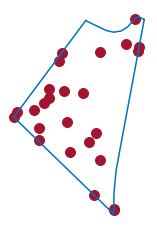

In [28]:
# Optimized from ex. layout

turbListOpt = [ 8368.945874, \
                8717.385825, \
                10168.69615, \
                6939.991474, \
                7588.288313, \
                10195.51552, \
                6912.085169, \
                8920.453459, \
                6098.3, \
                8775.650352, \
                7748.635356, \
                9364.475114, \
                6756.998056, \
                7255.24518, \
                7261.728278, \
                6221.58806, \
                9363.750656, \
                8555.57498, \
                7947.971464, \
                7831.511068, \
                10057.18645, \
                9765.591639, \
                8905.138115, \
                7659.698217, \
                7099.010372, \
                4072.50962, \
                760.7575801, \
                5446.992774, \
                2944.468705, \
                5146.839258, \
                5590.407921, \
                2537.66176, \
                1908.986501, \
                3297.5, \
                2785.015207, \
                4140.264044, \
                290.7043021, \
                3520.125633, \
                4229.962477, \
                3911.686919, \
                3463.0268, \
                255.6567831, \
                2500.63323, \
                2159.441702, \
                3145.974898, \
                6512.164102, \
                5693.0213, \
                5427.91776, \
                5393.836432, \
                3755.031525]

x0sOpt = makeCoordStruct(turbListOpt)
x0aOpt = makeCoordArray(x0sOpt)
exCoordsOpt = makeCoordMatrix(x0aOpt)
startAEPexOpt = iea37aepC.calcAEPcs3((exCoordsOpt * scaledTC), wind_dir_freq, wind_speeds, wind_speed_probs, wind_dir, turb_diam, turb_ci, turb_co, rated_ws, rated_pwr)
scaledAEPexOpt = sum(startAEPexOpt / scaledAEP)
print(scaledAEPexOpt)
#-- Plot the boundary --#
for i in range(numSides):
    plt.hold = True
    printBoundaryArray(segCoordList[i].x, splineList[i](segCoordList[i].x), 5)

#-- Plot the turbine locations --#
printTurbines(x0sOpt, getPltClrs().getColor(1), turb_diam/2)